In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/__init__.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/eli/anaconda3/envs/HTFA

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018.db')

In [5]:
dtfa = DTFA.DeepTFA(affvids_db.all(), mask='/home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz', num_factors=100, embedding_dim=2)

01/20/2019 11:19:20 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-10_task-AffVids_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
01/20/2019 11:19:36 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-10_task-AffVids_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
01/20/2019 11:19:51 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-10_task-AffVids_run-03_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
01/20/2019 11:20:07 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-11_task-AffVids_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, sm

In [6]:
dtfa.load_state('sub-CHECK_01202019_050244')

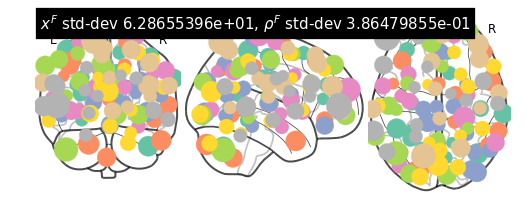

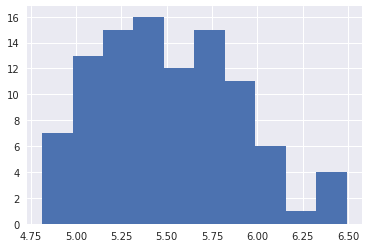

(<nilearn.plotting.displays.OrthoProjector at 0x7f96e408c0b8>,
 tensor([[-43.6381, -41.9722,  63.0920],
         [ 68.7355, -26.3150,  32.6172],
         [-27.8826, -43.7505, -10.8032],
         [-32.6842,  40.9060,  26.6365],
         [  8.3527, -72.4801,  41.1443],
         [  9.9673,  36.8924,  11.7857],
         [ 42.0070, -68.1245, -38.5550],
         [ 44.7409, -21.0231,  56.6659],
         [-18.0349, -62.5642,   2.1644],
         [ 14.5029, -56.9019,  21.8313],
         [-29.0938, -52.6372,  16.9818],
         [-27.2595, -15.3496,  33.7018],
         [ 11.7587,  16.3389,  60.0803],
         [  0.5100,   5.1513,  10.6411],
         [ 48.3041,  38.4962, -10.3011],
         [-40.4638, -67.0721,  45.7172],
         [ 55.6163,   8.0012, -32.4199],
         [ 18.2450,  -5.1743,  71.2873],
         [-37.9168,  29.4507,  52.1030],
         [ -1.7303, -58.0319, -50.3078],
         [ 63.5207, -44.5363,   4.9146],
         [-47.2294,   5.2569,  34.9936],
         [ 17.1173, -34.9654,  46.5

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
def task_labeler(b):
    if 'heights' in b.task:
        return 'Heights'
    elif 'social' in b.task:
        return 'Social threat'
    elif 'spider' in b.task:
        return 'Spiders'
    elif 'rest' in b.task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(b):
    if b.task == 'rest':
        return 'Rest'
    else:
        return 'Task'

In [9]:
losses = dtfa.train(num_steps=600, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=15, use_cuda=True, checkpoint_steps=100, blocks_batch_size=8, patience=100)

01/20/2019 11:38:14 [Epoch 1] (130030ms) Posterior free-energy 1.93755584e+09 = KL from prior 6.09123400e+06 - log-likelihood -1.93146445e+09
01/20/2019 11:38:14 Saving checkpoint...
01/20/2019 11:40:21 [Epoch 2] (127605ms) Posterior free-energy 1.95061376e+09 = KL from prior 5.80631700e+06 - log-likelihood -1.94480768e+09
01/20/2019 11:42:29 [Epoch 3] (127546ms) Posterior free-energy 1.96057395e+09 = KL from prior 5.82221600e+06 - log-likelihood -1.95475200e+09
01/20/2019 11:44:37 [Epoch 4] (128007ms) Posterior free-energy 1.96191078e+09 = KL from prior 5.83895000e+06 - log-likelihood -1.95607168e+09
01/20/2019 11:46:45 [Epoch 5] (128120ms) Posterior free-energy 1.95951603e+09 = KL from prior 5.87392500e+06 - log-likelihood -1.95364275e+09
01/20/2019 11:48:53 [Epoch 6] (128239ms) Posterior free-energy 1.95094541e+09 = KL from prior 5.87666150e+06 - log-likelihood -1.94506803e+09
01/20/2019 11:51:01 [Epoch 7] (127935ms) Posterior free-energy 1.94672678e+09 = KL from prior 5.88985000e+0

Epoch   323: reducing learning rate of group 0 to 5.0000e-03.
Epoch   323: reducing learning rate of group 1 to 5.0000e-04.


01/20/2019 23:08:54 [Epoch 325] (128152ms) Posterior free-energy 1.93520077e+09 = KL from prior 6.62460650e+06 - log-likelihood -1.92857651e+09
01/20/2019 23:11:02 [Epoch 326] (128079ms) Posterior free-energy 1.93007437e+09 = KL from prior 6.61945700e+06 - log-likelihood -1.92345498e+09
01/20/2019 23:13:10 [Epoch 327] (127890ms) Posterior free-energy 1.92780262e+09 = KL from prior 6.59074700e+06 - log-likelihood -1.92121216e+09
01/20/2019 23:15:18 [Epoch 328] (127470ms) Posterior free-energy 1.92744090e+09 = KL from prior 6.58138100e+06 - log-likelihood -1.92085952e+09
01/20/2019 23:17:25 [Epoch 329] (127297ms) Posterior free-energy 1.92729907e+09 = KL from prior 6.59933450e+06 - log-likelihood -1.92069990e+09
01/20/2019 23:19:32 [Epoch 330] (127463ms) Posterior free-energy 1.92718899e+09 = KL from prior 6.60006700e+06 - log-likelihood -1.92058854e+09
01/20/2019 23:21:40 [Epoch 331] (127496ms) Posterior free-energy 1.92709274e+09 = KL from prior 6.59115500e+06 - log-likelihood -1.92050

Epoch   485: reducing learning rate of group 0 to 2.5000e-03.
Epoch   485: reducing learning rate of group 1 to 2.5000e-04.


01/21/2019 04:53:56 [Epoch 487] (128071ms) Posterior free-energy 1.92615066e+09 = KL from prior 6.80444600e+06 - log-likelihood -1.91934694e+09
01/21/2019 04:56:04 [Epoch 488] (127799ms) Posterior free-energy 1.92507699e+09 = KL from prior 6.77568900e+06 - log-likelihood -1.91830144e+09
01/21/2019 04:58:11 [Epoch 489] (127488ms) Posterior free-energy 1.92470822e+09 = KL from prior 6.76747800e+06 - log-likelihood -1.91794099e+09
01/21/2019 05:00:19 [Epoch 490] (127537ms) Posterior free-energy 1.92465254e+09 = KL from prior 6.76345800e+06 - log-likelihood -1.91788902e+09
01/21/2019 05:02:26 [Epoch 491] (127782ms) Posterior free-energy 1.92462566e+09 = KL from prior 6.75816300e+06 - log-likelihood -1.91786701e+09
01/21/2019 05:04:35 [Epoch 492] (128088ms) Posterior free-energy 1.92461389e+09 = KL from prior 6.76132300e+06 - log-likelihood -1.91785190e+09
01/21/2019 05:06:42 [Epoch 493] (127331ms) Posterior free-energy 1.92460032e+09 = KL from prior 6.76056600e+06 - log-likelihood -1.91784

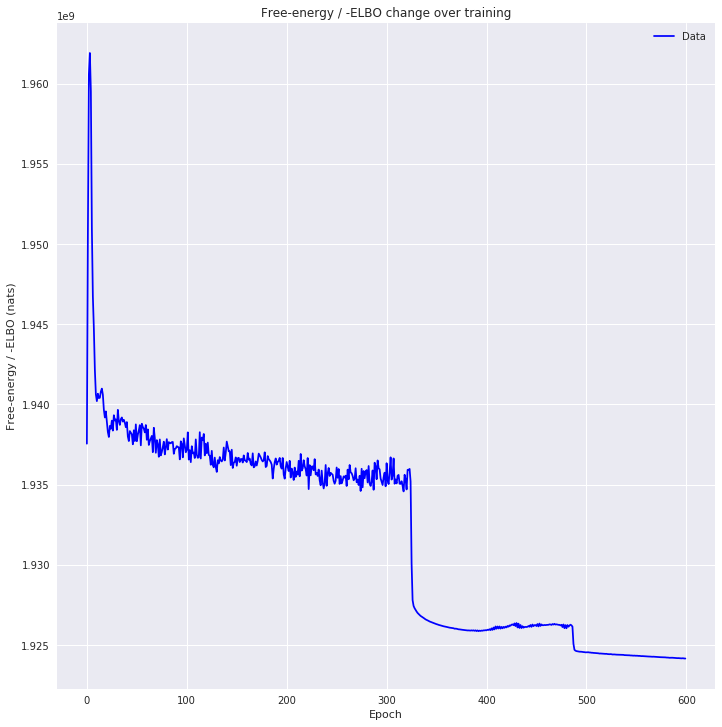

In [10]:
utils.plot_losses(losses)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


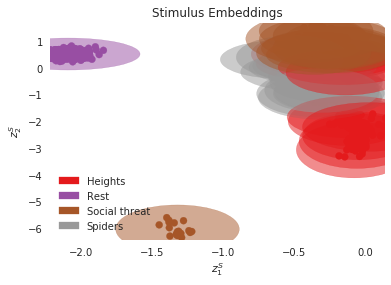

In [11]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [12]:
def subject_labeler(block):
    return 'Subject %d' % block.subject

def subject_run_labeler(block):
    return 'sub%drun%d' % (block.subject, block.run)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


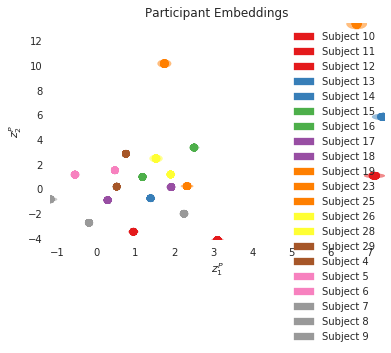

In [13]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


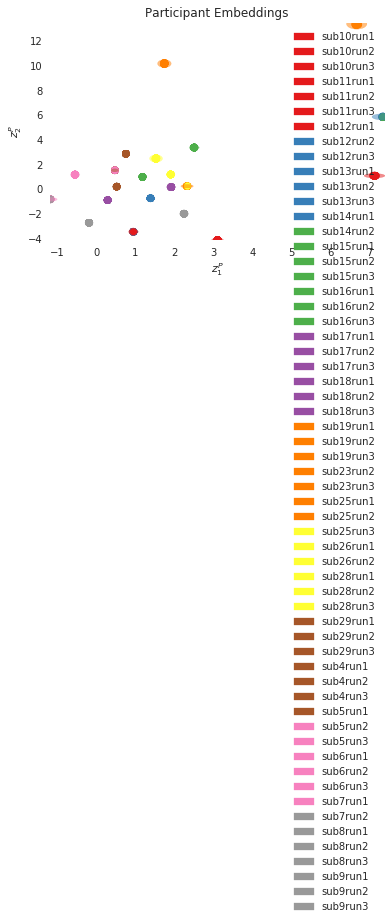

In [14]:
dtfa.scatter_subject_embedding(labeler=subject_run_labeler, figsize=None)

01/21/2019 08:54:50 Plotting factors for Participant 7, run 2


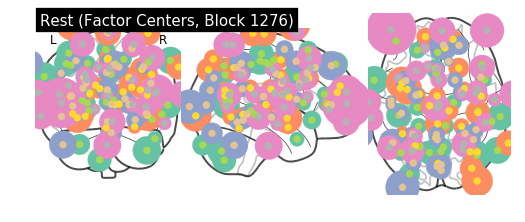

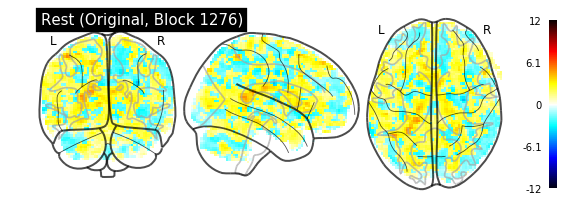

01/21/2019 08:54:54 Reconstruction Error (Frobenius Norm): 1.25340674e+03 out of 1.76750073e+03


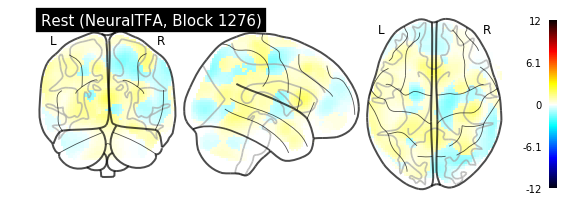

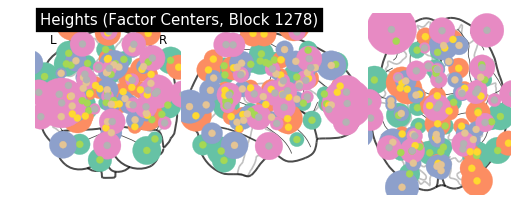

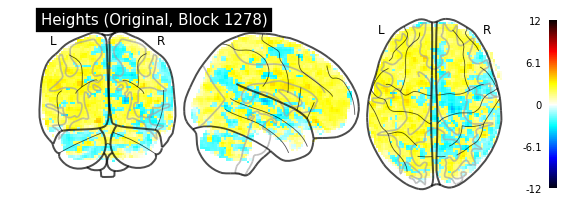

01/21/2019 08:54:58 Reconstruction Error (Frobenius Norm): 9.99524902e+02 out of 1.24527966e+03


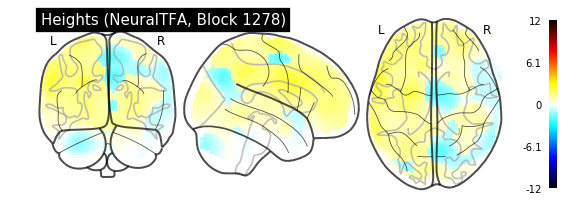

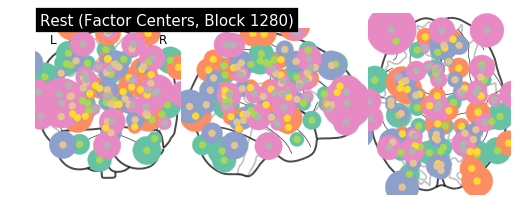

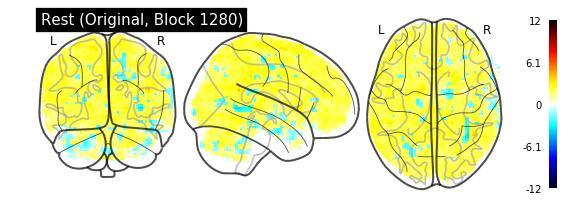

01/21/2019 08:55:03 Reconstruction Error (Frobenius Norm): 1.04604041e+03 out of 1.41961853e+03


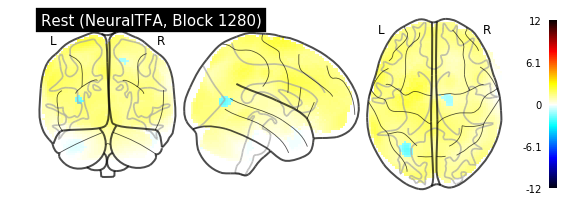

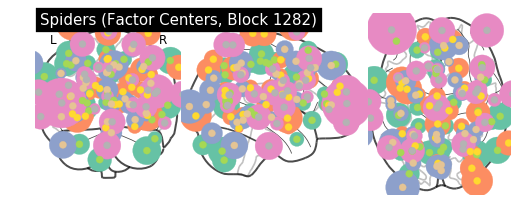

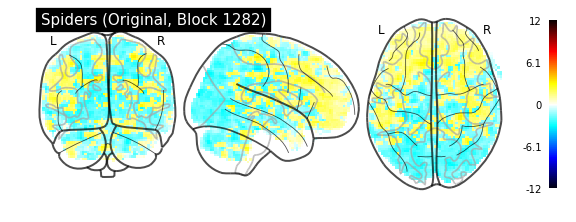

01/21/2019 08:55:07 Reconstruction Error (Frobenius Norm): 8.97499573e+02 out of 1.02631812e+03


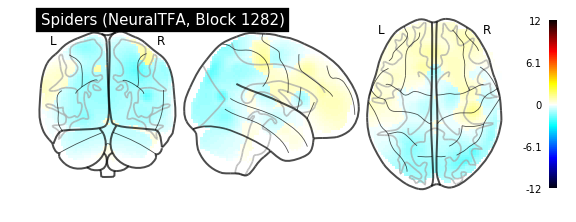

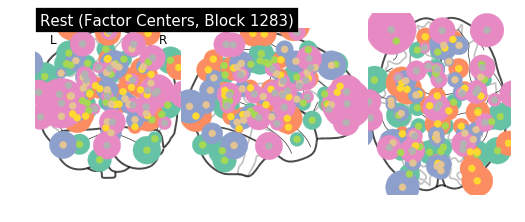

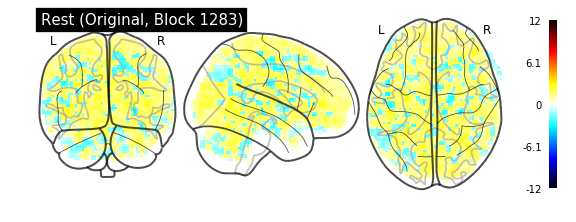

01/21/2019 08:55:11 Reconstruction Error (Frobenius Norm): 9.46959717e+02 out of 1.19818335e+03


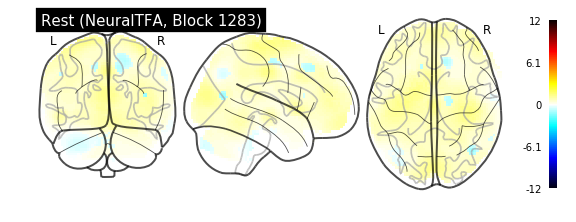

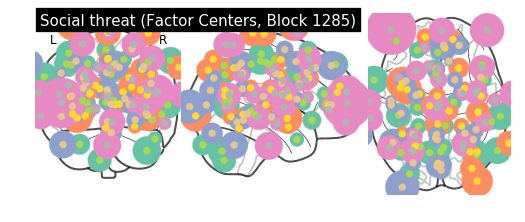

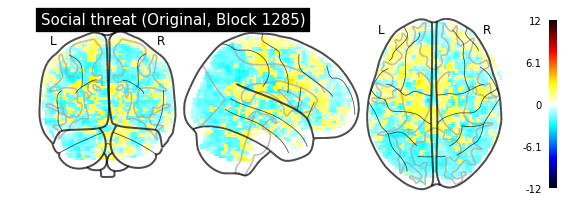

01/21/2019 08:55:16 Reconstruction Error (Frobenius Norm): 1.03460388e+03 out of 1.26225562e+03


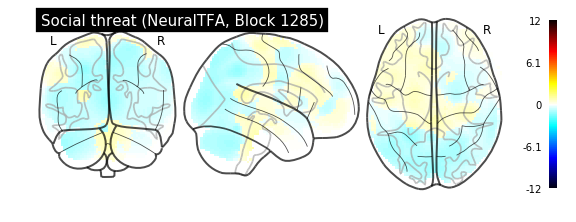

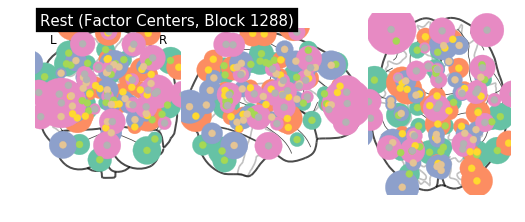

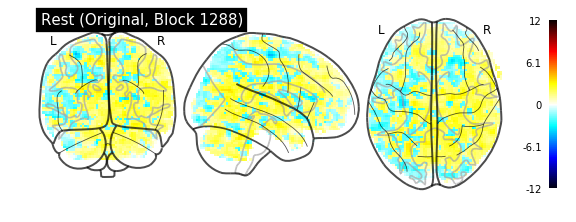

01/21/2019 08:55:20 Reconstruction Error (Frobenius Norm): 1.03071997e+03 out of 1.32568030e+03


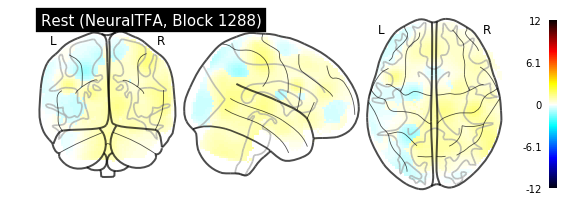

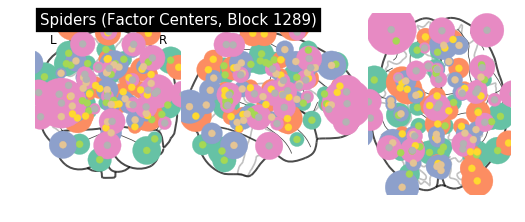

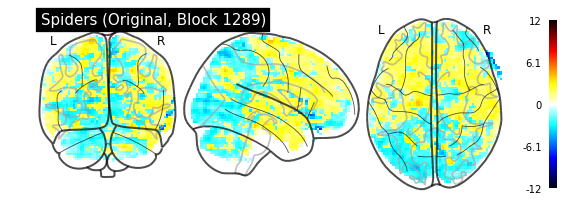

01/21/2019 08:55:24 Reconstruction Error (Frobenius Norm): 9.93164124e+02 out of 1.24074573e+03


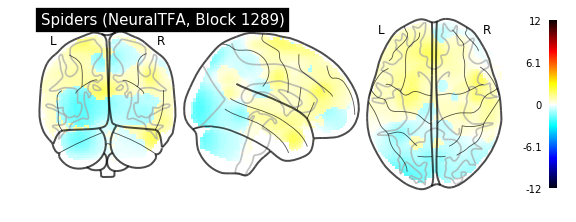

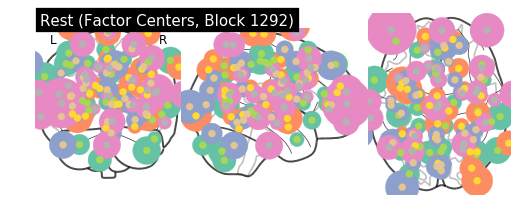

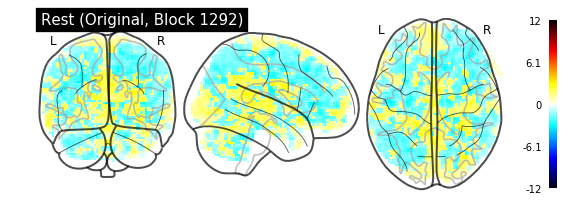

01/21/2019 08:55:29 Reconstruction Error (Frobenius Norm): 1.04338611e+03 out of 1.26962561e+03


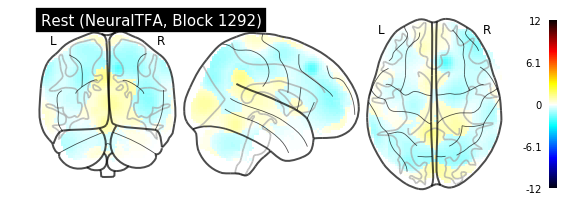

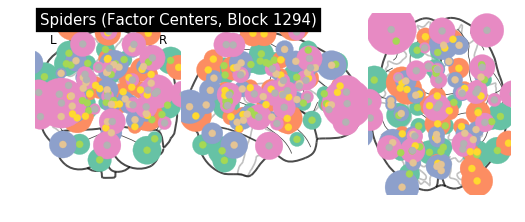

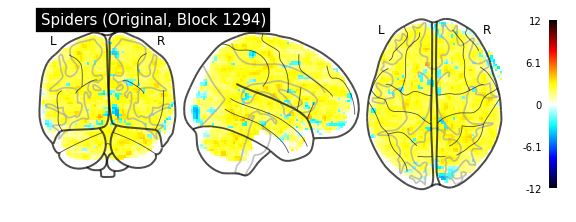

01/21/2019 08:55:33 Reconstruction Error (Frobenius Norm): 9.68516052e+02 out of 1.39178442e+03


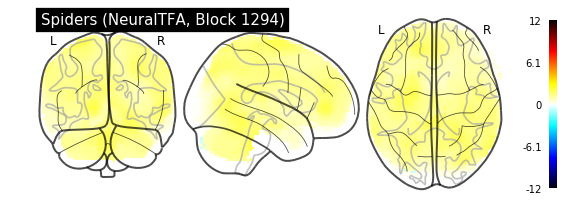

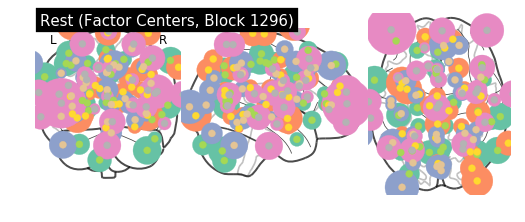

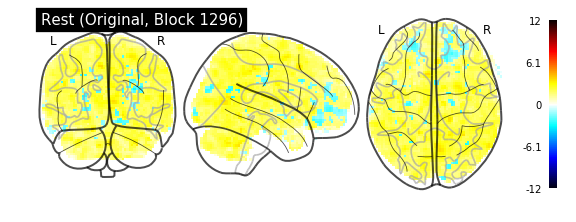

01/21/2019 08:55:37 Reconstruction Error (Frobenius Norm): 1.13725305e+03 out of 1.59803064e+03


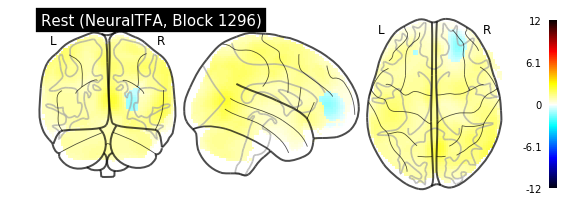

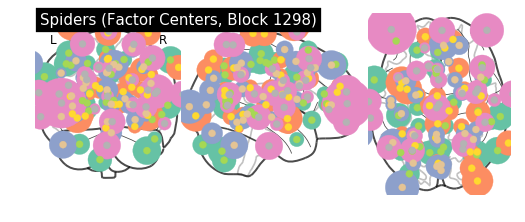

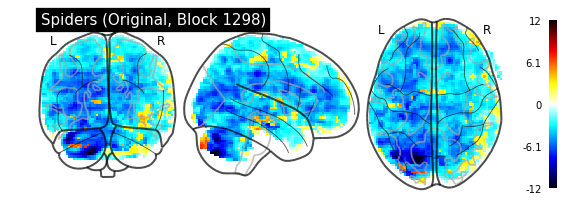

01/21/2019 08:55:42 Reconstruction Error (Frobenius Norm): 1.16262769e+03 out of 1.54318542e+03


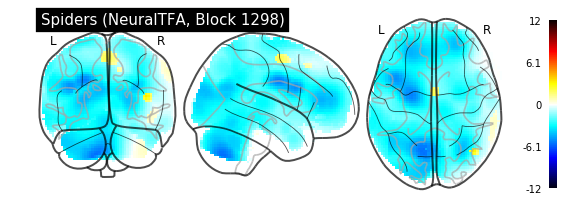

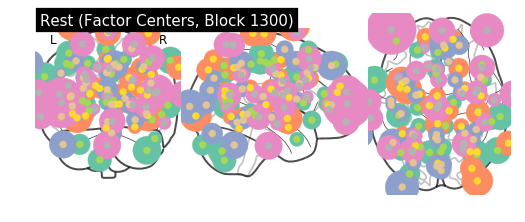

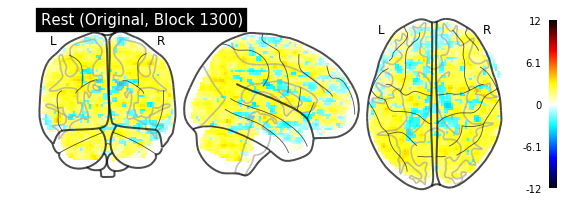

01/21/2019 08:55:46 Reconstruction Error (Frobenius Norm): 1.09390942e+03 out of 1.33942395e+03


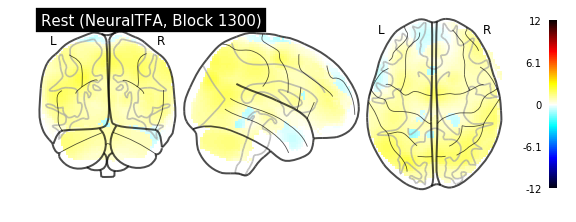

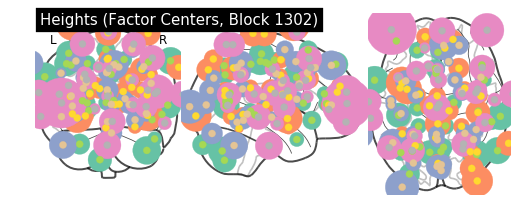

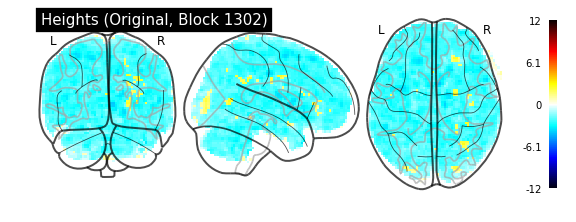

01/21/2019 08:55:50 Reconstruction Error (Frobenius Norm): 9.30170166e+02 out of 1.30258228e+03


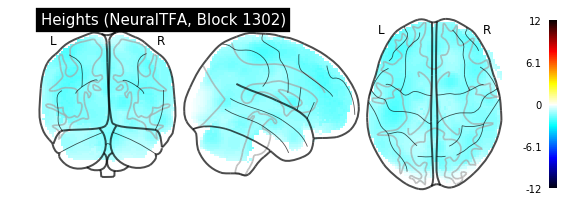

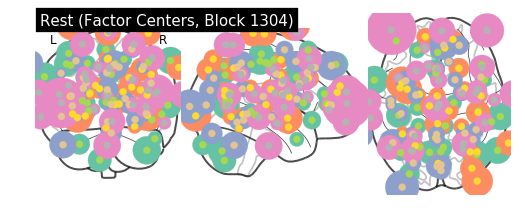

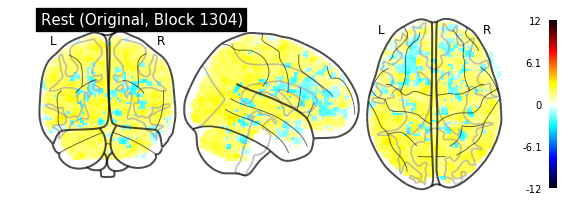

01/21/2019 08:55:55 Reconstruction Error (Frobenius Norm): 9.47969543e+02 out of 1.12025549e+03


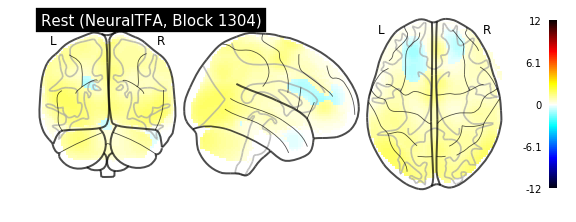

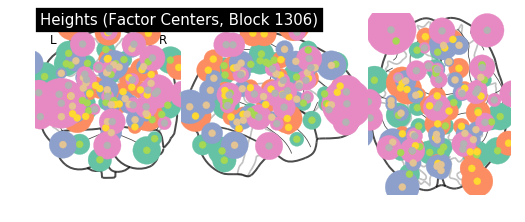

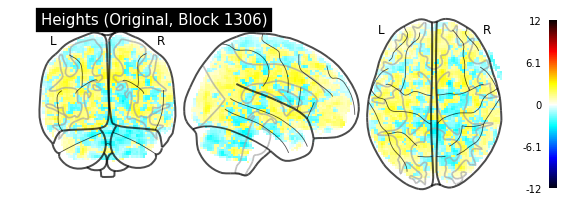

01/21/2019 08:55:59 Reconstruction Error (Frobenius Norm): 8.89742859e+02 out of 1.02732471e+03


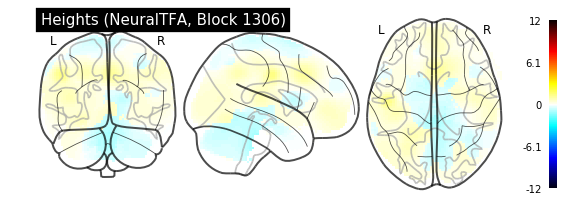

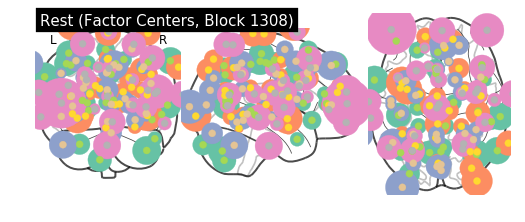

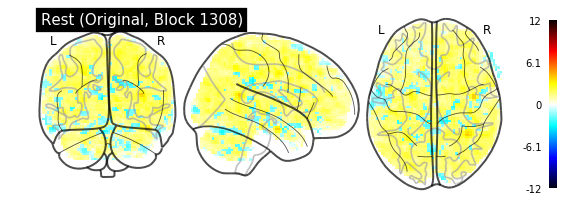

01/21/2019 08:56:03 Reconstruction Error (Frobenius Norm): 1.08816748e+03 out of 1.40469263e+03


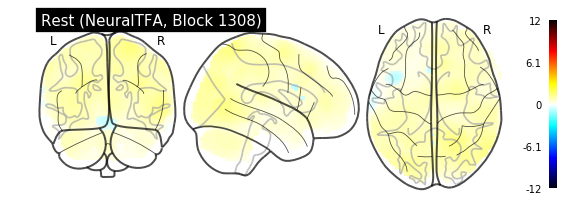

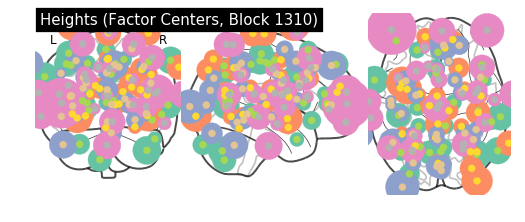

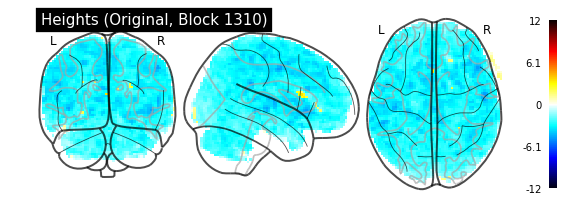

01/21/2019 08:56:08 Reconstruction Error (Frobenius Norm): 9.67703552e+02 out of 1.59744434e+03


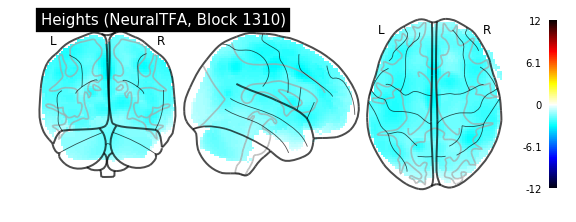

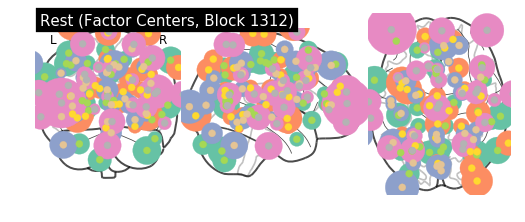

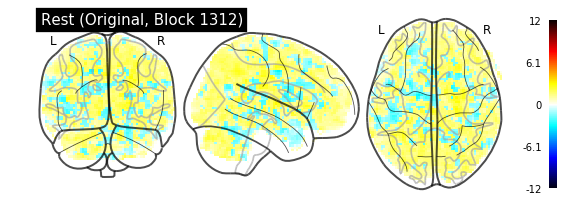

01/21/2019 08:56:12 Reconstruction Error (Frobenius Norm): 9.06073669e+02 out of 1.04710620e+03


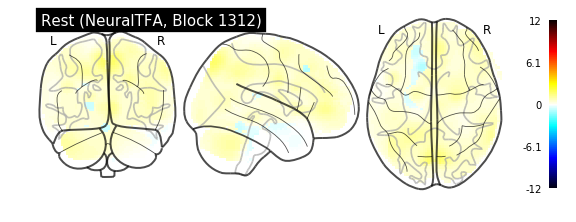

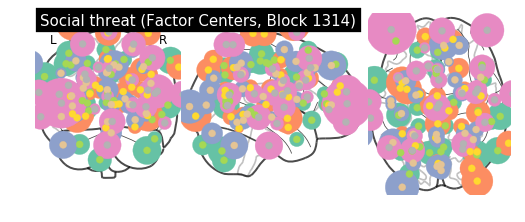

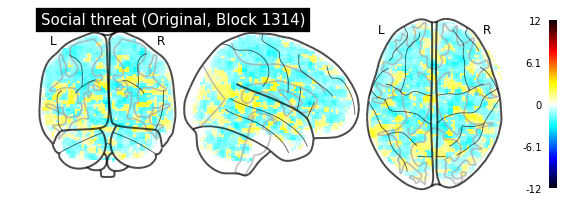

01/21/2019 08:56:16 Reconstruction Error (Frobenius Norm): 9.03050171e+02 out of 1.10279907e+03


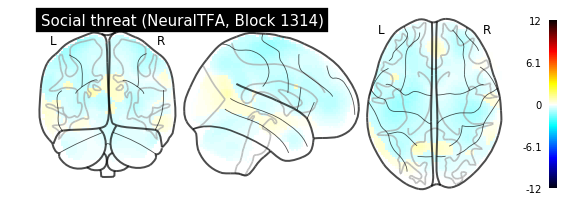

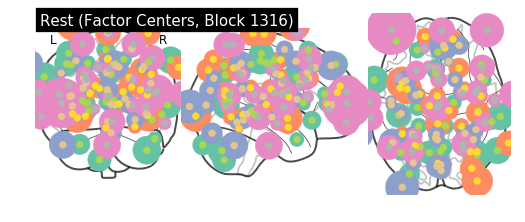

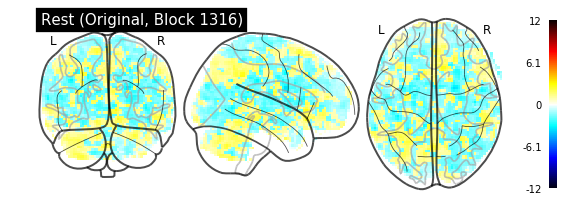

01/21/2019 08:56:21 Reconstruction Error (Frobenius Norm): 9.37441895e+02 out of 1.11184326e+03


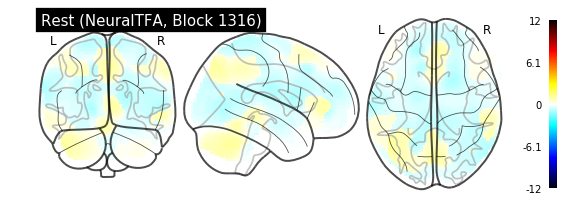

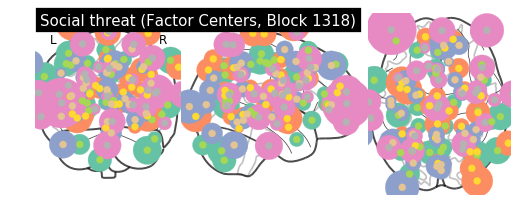

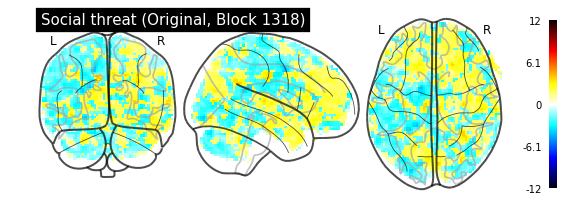

01/21/2019 08:56:25 Reconstruction Error (Frobenius Norm): 9.57223633e+02 out of 1.16590381e+03


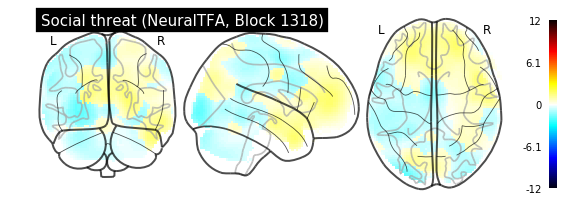

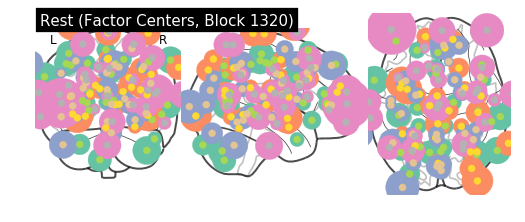

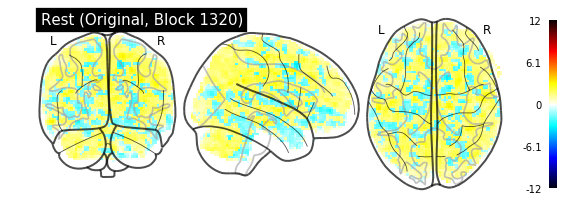

01/21/2019 08:56:29 Reconstruction Error (Frobenius Norm): 9.01104919e+02 out of 1.01173706e+03


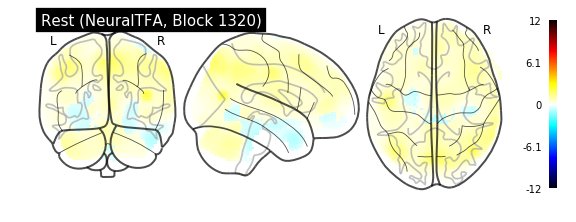

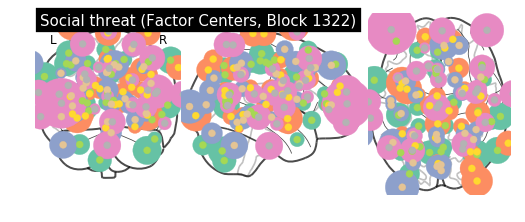

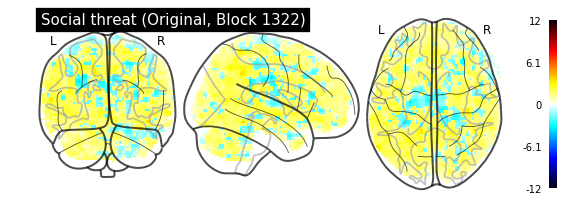

01/21/2019 08:56:34 Reconstruction Error (Frobenius Norm): 1.11291809e+03 out of 1.47123499e+03


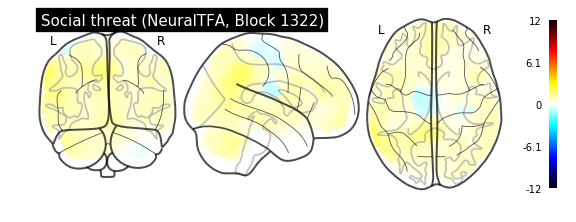

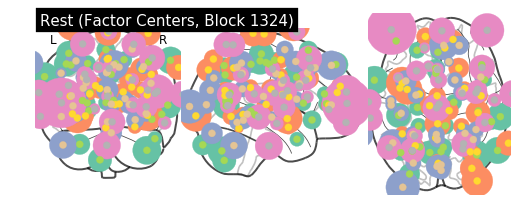

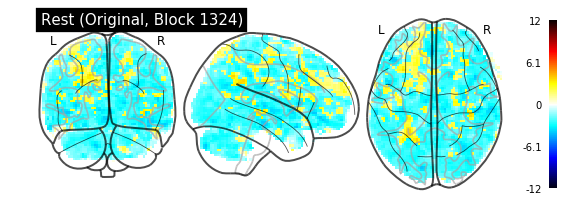

01/21/2019 08:56:38 Reconstruction Error (Frobenius Norm): 1.14733411e+03 out of 1.41117822e+03


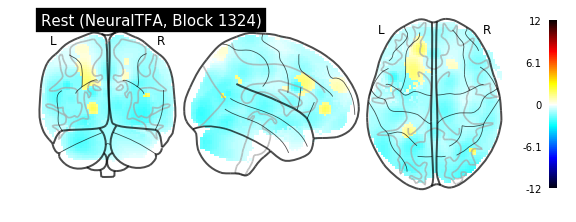

In [15]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=task_labeler)
        dtfa.plot_original_brain(index, labeler=task_labeler)
        dtfa.plot_reconstruction(index, labeler=task_labeler)


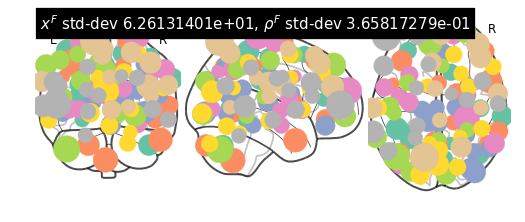

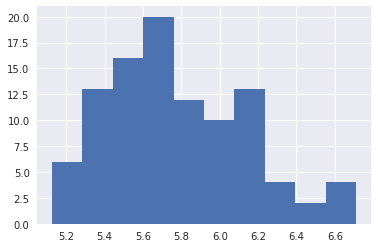

(<nilearn.plotting.displays.OrthoProjector at 0x7f943cc4b6d8>,
 tensor([[-4.3296e+01, -4.2053e+01,  6.2008e+01],
         [ 6.7580e+01, -2.8942e+01,  3.2387e+01],
         [-2.7374e+01, -4.4752e+01, -1.0597e+01],
         [-3.1559e+01,  4.0084e+01,  2.6558e+01],
         [ 7.8667e+00, -7.2780e+01,  4.1206e+01],
         [ 9.9237e+00,  3.7525e+01,  1.1166e+01],
         [ 4.2746e+01, -6.8694e+01, -3.7343e+01],
         [ 4.4548e+01, -2.0684e+01,  5.5691e+01],
         [-1.8955e+01, -6.3401e+01,  2.4630e+00],
         [ 1.2774e+01, -5.7704e+01,  2.1534e+01],
         [-2.9505e+01, -5.3250e+01,  1.6043e+01],
         [-2.8656e+01, -1.6825e+01,  3.4288e+01],
         [ 1.3472e+01,  1.7241e+01,  5.8653e+01],
         [ 7.7174e-01,  5.9235e+00,  1.1567e+01],
         [ 4.8988e+01,  3.9504e+01, -9.3472e+00],
         [-3.9594e+01, -6.7207e+01,  4.5918e+01],
         [ 5.4911e+01,  7.6452e+00, -3.1682e+01],
         [ 1.9456e+01, -4.3764e+00,  7.1864e+01],
         [-3.8390e+01,  2.9188e+01,  

In [16]:
dtfa.visualize_factor_embedding()

In [17]:
dtfa.average_reconstruction_error()

01/21/2019 09:00:56 Average reconstruction error (MSE): 8.29603345e-01
01/21/2019 09:00:56 Average data norm (Euclidean): 9.99668082e-01
01/21/2019 09:00:56 Percent average reconstruction error: 0.296834


(0.8296033449431227, 0.9996680820983048, 0.002968339847122379)